# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.5.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 74s 291ms/step - loss: 0.6801 - accuracy: 0.5692 - val_loss: 0.6429 - val_accuracy: 0.6435
Epoch 2/25
250/250 [==============================] - 73s 292ms/step - loss: 0.6205 - accuracy: 0.6622 - val_loss: 0.6126 - val_accuracy: 0.6775
Epoch 3/25
250/250 [==============================] - 73s 290ms/step - loss: 0.5743 - accuracy: 0.7036 - val_loss: 0.5408 - val_accuracy: 0.7240
Epoch 4/25
250/250 [==============================] - 80s 319ms/step - loss: 0.5386 - accuracy: 0.7276 - val_loss: 0.5222 - val_accuracy: 0.7465
Epoch 5/25
250/250 [==============================] - 83s 330ms/step - loss: 0.5114 - accuracy: 0.7460 - val_loss: 0.5115 - val_accuracy: 0.7440
Epoch 6/25
250/250 [==============================] - 88s 351ms/step - loss: 0.4867 - accuracy: 0.7626 - val_loss: 0.4804 - val_accuracy: 0.7735
Epoch 7/25
250/250 [==============================] - 71s 281ms/step - loss: 0.4787 - accuracy: 0.7646 - val_loss: 0.4948 - val_ac

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

NameError: name 'y_test' is not defined

## Part 4 - Making a single prediction

In [14]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [28]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


In [15]:
print(prediction)

dog


## Visualization of the Loss


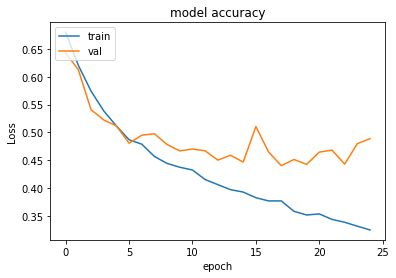

In [16]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

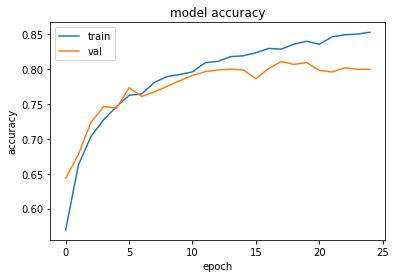

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [27]:
accuracy = round(history.history['accuracy'][-1], 2)
print(f'The model accuracy is: {accuracy}')

The model accuracy is: 0.85
